In [1]:
import pandas as pd 

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import seaborn as sns

In [5]:
import nltk

In [6]:
from wordcloud import WordCloud,STOPWORDS

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

In [9]:
from sklearn.linear_model import LogisticRegression as sa

In [10]:
from sklearn.naive_bayes import MultinomialNB as mnb

In [11]:
from sklearn.metrics import f1_score, roc_auc_score

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
import warnings 
warnings.filterwarnings("ignore")

In [14]:
train  = pd.read_csv("RacistAndSexistTrain.csv")

In [15]:
test = pd.read_csv("RacistAndSexistTest.csv")

In [16]:
train.sample(10)

,id,label,tweet
31578,31579,0,br? r u still here bothering and huing me? mic...
3642,3643,0,@user what about when you find out sully is no...
30388,30389,0,#friday! we look forward to a wonderful week...
918,919,0,have a happy sunday everyone!!!âï¸ðâð...
21660,21661,0,"smile,laugh and happy âºð #picoftheday #..."
1427,1428,0,i am thankful for my independence. #thankful #...
14974,14975,0,show this week with @user @user @user should b...
10041,10042,0,what will make you is the #love coming out o...
10720,10721,0,stay tuned for coverage of a very special perf...
2299,2300,0,couture fashions a double 5 hole for the shark...


In [17]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [18]:
df = train.append(test, ignore_index = True)

In [19]:
df.shape

(49159, 3)

In [20]:
train['cleaned_tweet'] = train.tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))

In [21]:

test['cleaned_tweet'] = test.tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))

In [22]:
normal_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 0]])

In [23]:
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]

In [24]:
pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]

In [25]:
pos_htag_freqcount = nltk.FreqDist(pos_htag)

In [26]:
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})

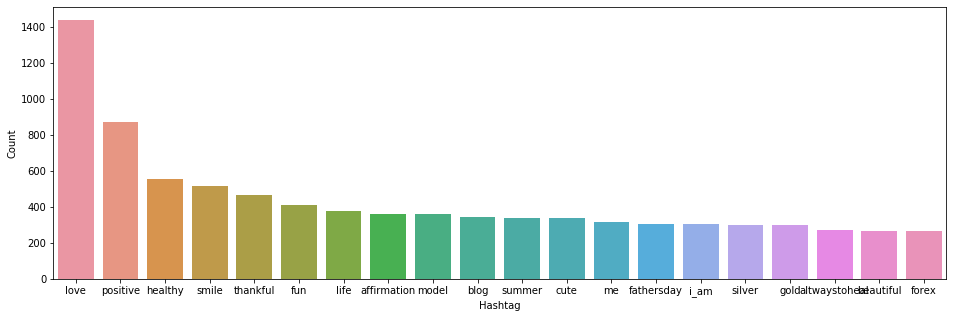

In [27]:
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [28]:
negative_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 1]])

In [29]:
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]

In [30]:
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]

In [31]:
neg_htag_freqcount = nltk.FreqDist(neg_htag)

In [32]:
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})

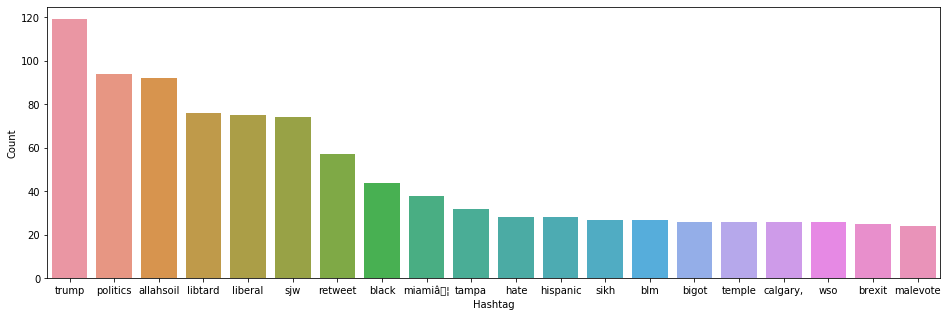

In [33]:
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
plt.show()

Normal words


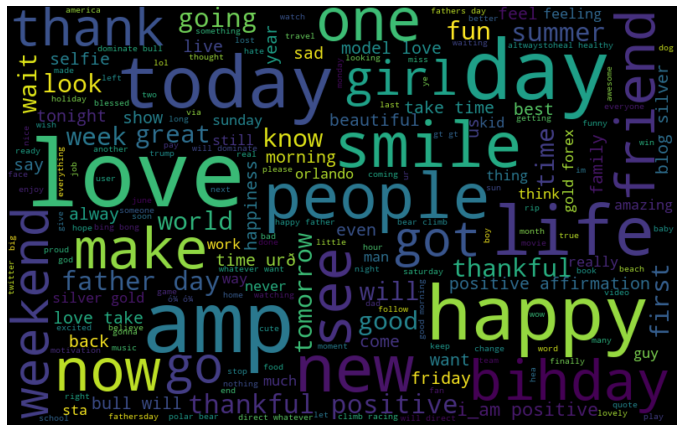

In [34]:
normal_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Racist And Sexist Tweets


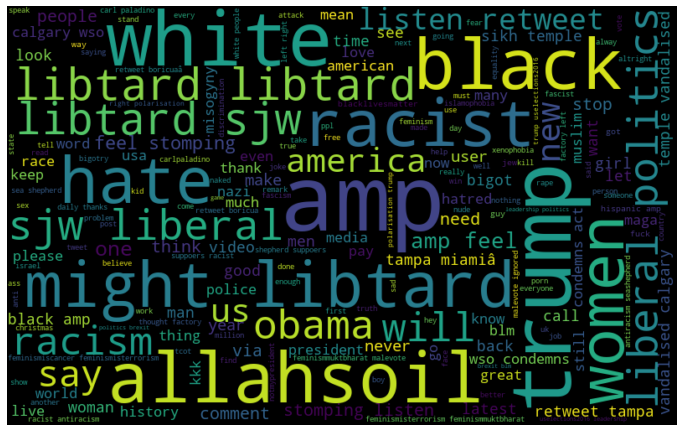

In [35]:
negative_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(negative_words)
print('Racist And Sexist Tweets')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [36]:
train.sample(2)

,id,label,tweet,cleaned_tweet
4124,4125,0,@user pathetic how #donaldtrump so easily tri...,pathetic how #donaldtrump so easily tries to m...
21041,21042,0,#humpday everyone! ð« #batman #earings #pi...,#humpday everyone! ð« #batman #earings #pira...


In [37]:
X_train, X_val, y_train, y_val = train_test_split(train['cleaned_tweet'], train['label'], random_state = 0)


In [38]:
X_train.shape, X_val.shape

((23971,), (7991,))

In [39]:
vect = CountVectorizer().fit(X_train)


In [40]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [41]:
print('Total features =', len(vect.get_feature_names()))

Total features = 34478


In [42]:
print(vect.get_feature_names()[::5000])

['00', 'btg', 'encouragement', 'ifcarlingdidperfectdays', 'mona', 'rdoequipment', 'technology']


In [43]:
X_train_vectorized = vect.transform(X_train)


In [44]:
X_train_vectorized

<23971x34478 sparse matrix of type '<class 'numpy.int64'>'
	with 266363 stored elements in Compressed Sparse Row format>

In [51]:
model = mnb()

In [52]:
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
pred = model.predict(vect.transform(X_val))

In [54]:
print('F1 :', f1_score(y_val, pred))

F1 : 0.5725288831835686


In [55]:
model = sa()

In [56]:
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
pred = model.predict(vect.transform(X_val))

In [58]:
print('F1 :', f1_score(y_val, pred))

F1 : 0.6441860465116279


In [59]:
vect = TfidfVectorizer().fit(X_train)

In [60]:
print('Total Features =', len(vect.get_feature_names()))

Total Features = 34478


In [61]:
X_train_vectorized = vect.transform(X_train)

In [63]:
model = sa()

In [66]:
model.fit(X_train_vectorized, y_train)
print("model")

model


In [67]:
pred = model.predict(vect.transform(X_val))

In [68]:
print('F1: ', f1_score(y_val, pred))

F1:  0.41907514450867056


In [69]:
vect = CountVectorizer(min_df = 2, ngram_range = (1,2)).fit(X_train)

In [70]:
X_train_vectorized = vect.transform(X_train)

In [71]:
print('Total Features =', len(vect.get_feature_names()))

Total Features = 38957


In [73]:
model = sa()

In [75]:
model.fit(X_train_vectorized, y_train)
print("model")

model


In [76]:
pred = model.predict(vect.transform(X_val))

In [77]:
print('F1: ', f1_score(y_val, pred))

F1:  0.6409356725146199


In [79]:
pipe = make_pipeline(CountVectorizer(), sa())

In [80]:
param_grid = {"logisticregression__C": [0.01, 0.1, 1, 10, 50, 100],
              "countvectorizer__min_df": [1,2,3],
              "countvectorizer__ngram_range": [(1,1), (1,2), (1,3)]}

In [81]:
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'f1', n_jobs = -1)

In [82]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                 

In [83]:
print('Best parameters:', grid.best_params_)

Best parameters: {'countvectorizer__min_df': 1, 'countvectorizer__ngram_range': (1, 1), 'logisticregression__C': 10}


In [84]:
vect = CountVectorizer(min_df = 1, ngram_range = (1,1)).fit(X_train)

In [85]:
X_train_vectorized = vect.transform(X_train)

In [86]:
print('Total Features =', len(vect.get_feature_names()))

Total Features = 34478


In [89]:
model = sa(C = 10)

In [92]:
model.fit(X_train_vectorized, y_train)
print("model")

model


In [93]:
pred = model.predict(vect.transform(X_val))

In [94]:
print('F1: ', f1_score(y_val, pred))

F1:  0.6811751904243744


In [95]:
print('Fraction of racist and sexist tweet in train data :', train.label.sum()/len(train))

Fraction of racist and sexist tweet in train data : 0.07014579813528565


In [96]:
print('Fraction of racist and sexist tweet predicted by model :', pred.sum()/len(pred))

Fraction of racist and sexist tweet predicted by model : 0.04855462395194594


In [97]:
pred_prob = model.predict_proba(vect.transform(X_val))

In [98]:
pred = np.where(pred_prob[:,1] > 0.35, 1, 0)

In [99]:
print('Fraction of racist and sexist tweet predicted by model :', sum(pred)/len(pred))

Fraction of racist and sexist tweet predicted by model : 0.055437367037917656


In [100]:
print('F1: ', f1_score(y_val, pred))

F1:  0.6960985626283367


In [101]:
feature_names = np.array(vect.get_feature_names())

In [102]:
sorted_coef_index = model.coef_[0].argsort()

In [103]:
print('Smallest_coefs :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

Smallest_coefs :
['mommas' 'hardcore' 'dating' 'bihday' 'orlando' 'healthy' 'day'
 'miscegenation' 'hack' 'rightly']



In [104]:
print('Largest_coefs :\n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Largest_coefs :
['allahsoil' 'bigot' 'inauguration' 'fakenews' 'spit' 'equality'
 'blacklivesmatter' 'brazilians' 'misogynist' 'malevote']


In [105]:
X_test = test['tweet']

In [106]:
test_pred = model.predict_proba(vect.transform(X_test))

In [107]:
predictions = np.where(test_pred[:,1] > 0.35, 1, 0)

In [108]:
results = pd.DataFrame(data = {'id' : test.id, 'label' : predictions})
